In [ ]:
!pip3 install scikit-plot

distutils: c:\users\athiranirmal\anaconda3\Include\UNKNOWN
sysconfig: c:\users\athiranirmal\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\athiranirmal\anaconda3\Include\UNKNOWN
sysconfig: c:\users\athiranirmal\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'c:\users\athiranirmal\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from tqdm.notebook import tqdm
from keras.utils.np_utils import to_categorical
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

In [ ]:
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import cohen_kappa_score, accuracy_score
from sklearn import metrics

In [ ]:
dataset = '../Tuberculosis_Project/TuberculosisDataset'
directories = os.listdir(dataset)
print(directories)

['montegory']


In [ ]:
def Read_Images_and_Make_Numpy_Files(directory,path):
    images = []
    labels = []
    classes = os.listdir(os.path.join(path, directory))
    print('{} Directorclassesy Classes: {}'.format(directory, classes))
    for class_ in classes:
        if class_ == 'Abnormal':
            print('Reading Data for {} class'.format(class_))
            imageNames = os.listdir(os.path.join(path, directory, class_))
            print(imageNames)
            for imgName in tqdm(imageNames):
                img = load_img(os.path.join(path, directory, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
                img_array = img_to_array(img, data_format='channels_last', dtype='float32')
                images.append(img_array)
                labels.append(0)
        elif class_ == 'Normal':
            print('Reading Data for {} class'.format(class_))
            imageNames = os.listdir(os.path.join(path, directory, class_))
            for imgName in tqdm(imageNames):
                img = load_img(os.path.join(path, directory, class_, imgName), target_size=(224, 224), color_mode='rgb', interpolation='lanczos')
                img_array = img_to_array(img, data_format='channels_last', dtype='float32')
                images.append(img_array)
                labels.append(1)
    images = np.array(images).reshape(-1, 224, 224, 3)
    print('{} Data: {}'.format(directory, images.shape))
    labels = np.array(labels)
    print('{} Labels: {}'.format(directory, labels.shape))
    np.save('../Tuberculosis_Project/Numpy Arrays/{}_images'.format(directory), images)
    np.save('../Tuberculosis_Project/Numpy Arrays/{}_labels'.format(directory), labels)

In [ ]:
for directory in directories:
    path = os.path.join(dataset,directory)
    print(path)
    dataset_dir = os.listdir(path)
    print(dataset_dir)
    for sub_dir in dataset_dir:
        if sub_dir=='train':
            Read_Images_and_Make_Numpy_Files(sub_dir,path)
        elif sub_dir=='val':
            Read_Images_and_Make_Numpy_Files(sub_dir,path)

C:\Users\ATHIRANIRMAL\Desktop\PROJECT\Tuberculosis_Project\TuberculosisDataset\montegory
['train', 'val']
train Directorclassesy Classes: ['Abnormal', 'Normal']
Reading Data for Abnormal class
['MCUCXR_0104_1.png', 'MCUCXR_0108_1.png', 'MCUCXR_0113_1.png', 'MCUCXR_0117_1.png', 'MCUCXR_0126_1.png', 'MCUCXR_0140_1.png', 'MCUCXR_0141_1.png', 'MCUCXR_0142_1.png', 'MCUCXR_0144_1.png', 'MCUCXR_0150_1.png', 'MCUCXR_0166_1.png', 'MCUCXR_0170_1.png', 'MCUCXR_0173_1.png', 'MCUCXR_0182_1.png', 'MCUCXR_0188_1.png', 'MCUCXR_0194_1.png', 'MCUCXR_0195_1.png', 'MCUCXR_0196_1.png', 'MCUCXR_0203_1.png', 'MCUCXR_0213_1.png', 'MCUCXR_0223_1.png', 'MCUCXR_0251_1.png', 'MCUCXR_0253_1.png', 'MCUCXR_0254_1.png', 'MCUCXR_0255_1.png', 'MCUCXR_0258_1.png', 'MCUCXR_0264_1.png', 'MCUCXR_0266_1.png', 'MCUCXR_0275_1.png', 'MCUCXR_0282_1.png', 'MCUCXR_0294_1.png', 'MCUCXR_0311_1.png', 'MCUCXR_0331_1.png', 'MCUCXR_0334_1.png', 'MCUCXR_0338_1.png', 'MCUCXR_0348_1.png', 'MCUCXR_0354_1.png', 'MCUCXR_0362_1.png', 'MCUCXR_


Reading Data for Normal class



train Data: (96, 224, 224, 3)
train Labels: (96,)
val Directorclassesy Classes: ['Abnormal', 'Normal']
Reading Data for Abnormal class
['MCUCXR_0162_1.png', 'MCUCXR_0218_1.png', 'MCUCXR_0228_1.png', 'MCUCXR_0243_1.png', 'MCUCXR_0289_1.png', 'MCUCXR_0301_1.png', 'MCUCXR_0309_1.png', 'MCUCXR_0313_1.png', 'MCUCXR_0316_1.png', 'MCUCXR_0350_1.png', 'MCUCXR_0352_1.png', 'MCUCXR_0367_1.png']



Reading Data for Normal class



val Data: (28, 224, 224, 3)
val Labels: (28,)


In [ ]:
dataDir = '../Tuberculosis_Project/Numpy Arrays'
train_x = np.load(dataDir+'/train_images.npy')
train_y = np.load(dataDir+'/train_labels.npy')
test_x = np.load(dataDir+'/val_images.npy')
test_y = np.load(dataDir+'/val_labels.npy')

print('Training Images: {} | Test Images: {}'.format(train_x.shape, test_x.shape))
print('Training Labels: {} | Test Labels: {}'.format(train_y.shape, test_y.shape))

# Data Normalization

print('Train: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), test_x.min(), test_x.max()))

train_x/=255.0
test_x/=255.0

print('Train: {} , {} | Test: {} , {}'.format(train_x.min(), train_x.max(), test_x.min(), test_x.max()))

Training Images: (96, 224, 224, 3) | Test Images: (28, 224, 224, 3)
Training Labels: (96,) | Test Labels: (28,)
Train: 0.0 , 255.0 | Test: 0.0 , 255.0
Train: 0.0 , 1.0 | Test: 0.0 , 1.0


In [ ]:
# train_y_oneHot = to_categorical(train_y, num_classes=2)
# test_y_oneHot = to_categorical(test_y, num_classes=2)
# print('Training Labels: {} | Test Labels: {}'.format(train_y_oneHot.shape, test_y_oneHot.shape))

Training Labels: (110, 2) | Test Labels: (28, 2)


In [ ]:
# Class Mapping 
print('0:Normal | 1:Abnormal')

# Distribution of images in each class for Training-set
print(Counter(train_y))

# Distribution of images in each class for Test-set
print(Counter(test_y))

#Make Labels Categorical
train_y_oneHot = tf.one_hot(train_y, depth=2) 
test_y_oneHot = tf.one_hot(test_y, depth=2)

print('Training Labels: {} | Test Labels: {}'.format(train_y_oneHot.shape, test_y_oneHot.shape))

0:Normal | 1:Abnormal
Counter({1: 50, 0: 46})
Counter({1: 16, 0: 12})
Training Labels: (96, 2) | Test Labels: (28, 2)


In [ ]:
# initialize the training data augmentation object
trainAug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=15, fill_mode="nearest")

def VGG19_Model():
    # load the VGG16 network, ensuring the head FC layer sets are left off
    baseModel = tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_tensor=tf.keras.layers.Input(shape=(224, 224, 3)))
    # construct the head of the model that will be placed on top of the the base model
    output = baseModel.output
    output = tf.keras.layers.AveragePooling2D(pool_size=(4, 4))(output)
    output = tf.keras.layers.Flatten(name="flatten")(output)
    output = tf.keras.layers.Dense(256, activation="relu")(output)
    output = tf.keras.layers.Dropout(0.5)(output)
    output = tf.keras.layers.Dense(2, activation="softmax")(output)
    # place the head FC model on top of the base model (this will become the actual model we will train)
    model = tf.keras.Model(inputs=baseModel.input, outputs=output)
    # loop over all layers in the base model and freeze them so they will not be updated during the first training process
    for layer in baseModel.layers:
        layer.trainable = False
    return model

model = VGG19_Model()
#compile our model
print("[INFO] compiling model...")
# initialize the initial learning rate, number of epochs to train for, and batch size
INIT_LR = 0.001
EPOCHS = 20
BATCHSIZE = 10
optimizer = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
print(model.summary())

80142336/80134624 [==============================] - 83s 1us/step
[INFO] compiling model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________

In [ ]:
modelPath = '../Tuberculosis_Project/Saved Models/Pretrained VGG19'
if not os.path.exists(modelPath):
    os.makedirs(modelPath)
    print('Model Directory Created')
else:
    print('Model Directory Already Exists')
model_checkpoint = ModelCheckpoint(modelPath+'/vgg19-best-model.h5', monitor="val_categorical_accuracy",
                                                      verbose=1, save_best_only=True, mode="max")
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

STEP_TRAIN = len(train_x) // BATCHSIZE
STEP_TEST = len(test_x) // BATCHSIZE
print(test_x.shape)

Model Directory Created
(28, 224, 224, 3)


In [ ]:
for key in modelHistory.history:
    print(key)

loss
accuracy


In [ ]:
modelHistory = model.fit_generator(trainAug.flow(train_x, train_y_oneHot, batch_size=BATCHSIZE), epochs=30, verbose=1, callbacks=[model_checkpoint],
                         validation_data=(test_x, test_y_oneHot), shuffle = True, steps_per_epoch=STEP_TRAIN, validation_steps=STEP_TEST)


Epoch 1/30
9/9 [==============================] - 52s 6s/step - loss: 0.7053 - categorical_accuracy: 0.5465 - auc: 0.5664 - val_loss: 0.6779 - val_categorical_accuracy: 0.6071 - val_auc: 0.6977

Epoch 00001: val_categorical_accuracy did not improve from 0.67857
Epoch 2/30
9/9 [==============================] - 48s 5s/step - loss: 0.7129 - categorical_accuracy: 0.5667 - auc: 0.5190 - val_loss: 0.6720 - val_categorical_accuracy: 0.5714 - val_auc: 0.6798

Epoch 00002: val_categorical_accuracy did not improve from 0.67857
Epoch 3/30
9/9 [==============================] - 46s 5s/step - loss: 0.7338 - categorical_accuracy: 0.5233 - auc: 0.5064 - val_loss: 0.6758 - val_categorical_accuracy: 0.5714 - val_auc: 0.7079

Epoch 00003: val_categorical_accuracy did not improve from 0.67857
Epoch 4/30
9/9 [==============================] - 46s 5s/step - loss: 0.6771 - categorical_accuracy: 0.6628 - auc: 0.6503 - val_loss: 0.6800 - val_categorical_accuracy: 0.6786 - val_auc: 0.6518

Epoch 00004: val_ca

In [ ]:
tf.keras.models.save_model(model, modelPath+'/vgg19-model.h5', overwrite=True, include_optimizer=True, save_format=None,
                           signatures=None, options=None)

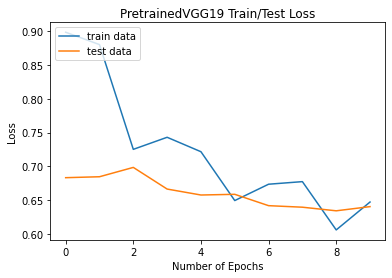

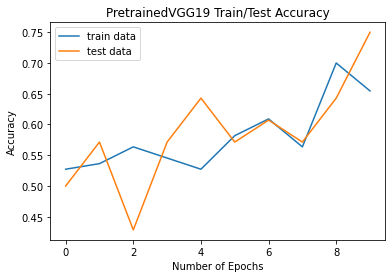

In [ ]:
import matplotlib.pyplot as plt
losshistoryPath = './Train-Test History/Loss'
acchistoryPath = './Train-Test History/Accuracy'
if not os.path.exists(losshistoryPath) or not os.path.exists(acchistoryPath):
    os.makedirs(losshistoryPath)
    os.makedirs(acchistoryPath)
      
# Plot history: Loss
plt.plot(modelHistory.history['loss'], label='train data')
plt.plot(modelHistory.history['val_loss'], label='test data')
plt.title('PretrainedVGG19 Train/Test Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
plt.savefig('./Train-Test History/Loss/VGG19-loss-Graph.png', bbox_inches = "tight")
plt.show()

# Plot history: Accuracy
plt.plot(modelHistory.history['categorical_accuracy'], label='train data')
plt.plot(modelHistory.history['val_categorical_accuracy'], label='test data')
plt.title('PretrainedVGG19 Train/Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(loc="upper left")
plt.savefig('./Train-Test History/Accuracy/VGG19-Accuracy-Graph.png', bbox_inches = "tight")
plt.show()

In [ ]:
# Evaluate the Best Saved Model
bestModel = tf.keras.models.load_model(modelPath+'/vgg19-best-model.h5')
loss, accuracy, auc = bestModel.evaluate(x=test_x, y=test_y_oneHot, batch_size=32, verbose=1)
print('Model Accuracy: {:0.2f} | Model AUC: {:0.2f} | Model Loss: {:0.4f}'.format(accuracy, auc, loss))

1/1 [==============================] - 0s 5ms/step - loss: 0.6407 - categorical_accuracy: 0.7500 - auc_2: 0.7838
Model Accuracy: 0.75 | Model AUC: 0.78 | Model Loss: 0.6407


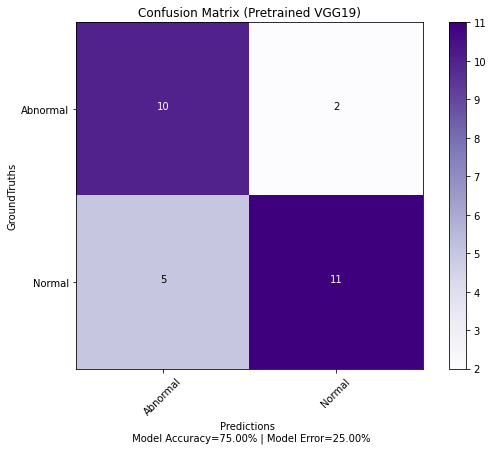

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('GroundTruths')
    plt.xlabel('Predictions \n Model Accuracy={:0.2f}% | Model Error={:0.2f}%'.format(accuracy*100, misclass*100))
    plt.savefig('../Tuberculosis_Project/Confusion Matrix/VGG19-cm.png', bbox_inches = "tight")
    plt.show()


predictions = model.predict(x=test_x, batch_size=10)
predictions = tf.keras.backend.argmax(predictions, axis=-1)

cm = confusion_matrix(test_y, predictions)
classes = ['Abnormal', 'Normal']
plot_confusion_matrix(cm=cm, normalize = False, target_names = classes, title= "Confusion Matrix (Pretrained VGG19)")


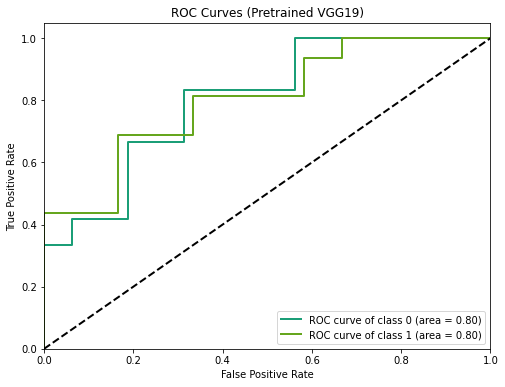

In [ ]:
#Plot ROC Curve with Library
predictions = model.predict(x=test_x, batch_size=32)
# One can define colormap here
# cmap = mpl.colors.ListedColormap(['red', 'green', 'blue', 'cyan'])
scikitplot.metrics.plot_roc(y_true=test_y, y_probas=predictions, title='ROC Curves (Pretrained VGG19)', plot_micro=False, plot_macro=False,
                            classes_to_plot=None, ax=None, figsize=(8, 6), cmap='Dark2', title_fontsize='large', text_fontsize='medium')
plt.savefig('../Tuberculosis_Project/Confusion Matrix/VGG19-roc.png', bbox_inches = "tight")
plt.show()

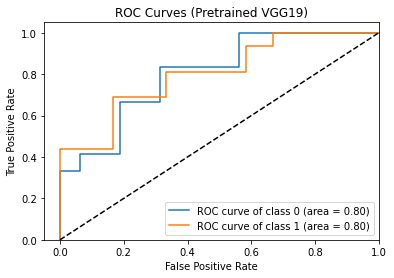

In [ ]:
#Plot ROC Curve with Fuction
from sklearn.metrics import roc_curve, auc
predictions = bestModel.predict(x=test_x, batch_size=32)
n_classes = np.uint8(test_y_oneHot).shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.uint8(test_y_oneHot)[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
    ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (Pretrained VGG19)')
plt.legend(loc="lower right")
plt.show()
